# K-Means Clustering

**K-Means** 
- Unsupervised ML algorithm as their is no Target variable for the data.
- K-means makes clusters of different instances with similar features.

## K-Means Algorithm

1. Dataset and Number of cluster(K) are given as input to the model.

2. Centroids can be assigned randomly or we can sort dataset split it into K portions and one point from each portion can be selected as Centroid

3. All the datapoints are plotted in space and each of them is assigned to nearest centroids based on the Euclidean distances. Based on this clusters are formed.

4. New centroid position is updated by taking the mean distance of all the distances measured within the cluster.

5. After new centroid formation, this iterations goes on until stopping criteria is satisfied.
   - Stopping criterias are as follows - 
     1. Until new cluster is not formed
     2. Until new position of centroid is not found.
     3. The distance of datapoint from centroid is minimum
     4. Number of iterations specified by user

6. Hence we end up with the formation of groups which have instances of similar features.

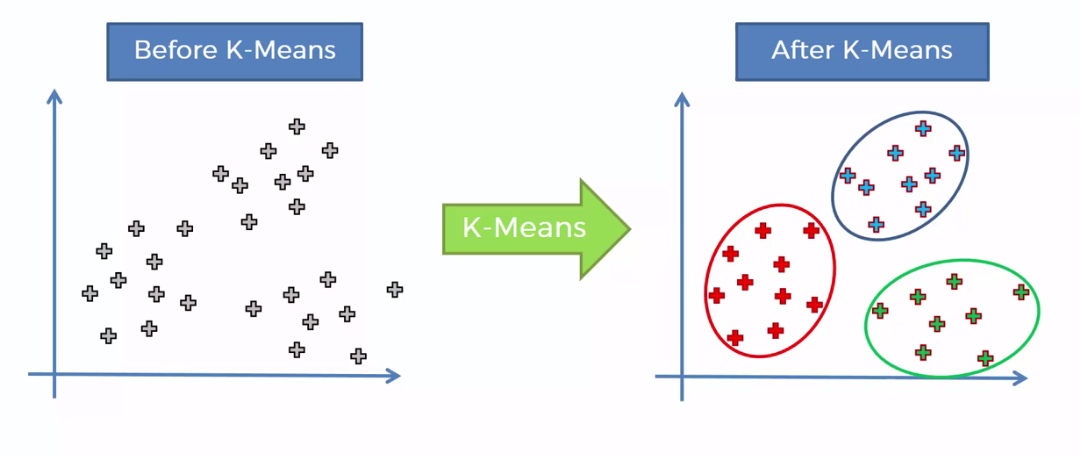


## K-Means Intuition

Here we can see the 2 centroids are given and then neaest point to those centroids are assigned to them and clusters formed, after that new centroids are updated and process continued untill the condition where new centroids cannot be found.
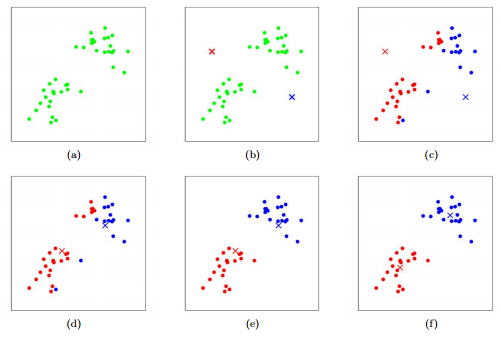

## Performance Metrics

#### Inertia - 

- Inertia is the measure of how coherent and consistent the clusters are formed. which means how close the points are within the clusters.

- It is assumed that lower the inertia better is the performance of model and 0 inertia is optimal.

- Inertia does not perform well in case of elongated and irregular shapes clusters.

- Inertia is not normalised metric and in higher dimensional spaces euclidean distances inflated due to "curse of dimensionality" hence it cannot be ideal metric but can be used roughly for K-Means.

#### Silhousette score - 

- It tells us how far the datapoints are from datapoints from other clusters.

- Its range varies from -1 to 1 and higher value the higher is the performance.

Calculation of Silhousette Score as follows -
$a(i)$ - means the average distance of points within the cluster 
$b(i)$ - means the average distance between the centroid and datapoints of another nearest cluster.

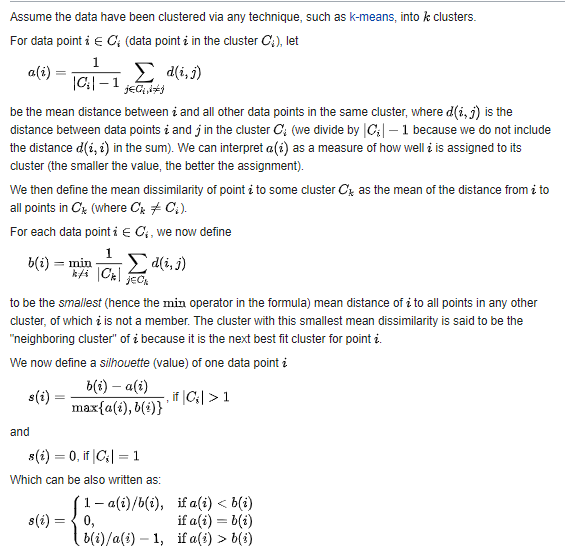

## Elbow Method for optimal value of K - 

- Performance of the K-Means model depends upon the number clusters to be formed, hence their is most important to specify optimum value of K.

- The Optimum value of K can be finded by Elbow Method.

- In Elbow method we plot the range of K value and Inertia or **sum of squared error** of repsective k values. and the the value of K chosen such that it gives significant change in variation of inertia value.

- From below graphical representation we cansee that their is significant chang in Distortion that is Inertia at K=3 hence 3 is choosen as ideal value of K.

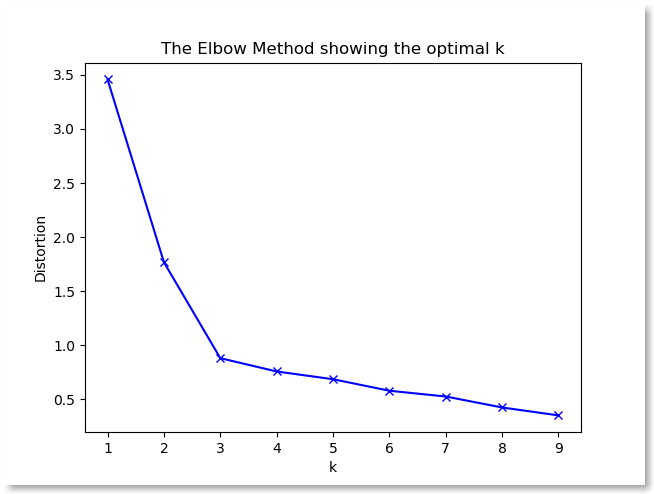

Accuracy metrics
-------------------------
As opposed to classfication, it is difficult to assess the quality of results from clustering. Here, a metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

There are internal and external goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics.

--------------------------------------
### 1. External Goodness Metrics

F-measure, Normalized Mutual Information(the average mutual information between every pair of clusters and their class), Rand Index etc.

-------------------------------------
### 2.  Internal Goodness Metrics

Davies-Bouldin index,Silhouette index,Dunn index,Partition Coefficient, Entropy,Separation Index,Xie and Beni's Index etc.

#### 2.1 Normalized Mutual Information (NMI)

Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means a perfect match.

#### 2.2 Adjusted Rand Score (ARS)

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.

# K-Means for Clustering the for credit card data

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 2. Importing Dataset

In [2]:
data = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/credit_card_preprocessed.csv')
data.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3. Standerdization of Data

- K-Means is uses the distance metrics like Euclidean Distance, hence it is very much sensitive to scale and it requires all the features of data to be on he same scale.

- If one feature is having large variations as compared to other feature it will have greater influence on the final results in clustering.

- Hence to avoid this and give the equal weightage of importance to all the features we need to standerdized the data.

- Standerdization and Normalisation results data which is in the range of 0 to 1.

In [3]:
# Standerdization
scalar = StandardScaler()
data = scalar.fit_transform(data)

# Normalisation
data = normalize(data)

# Converting to pd Dataframe
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.594007,-0.251064,-0.085553,-0.145736,-0.122424,-0.119730,-0.160102,-0.276617,-0.232773,-0.242600,-0.231637,-0.163287,-0.175381,-0.329399,-0.181434,-0.103720,-0.180258,0.123709
1,-0.435545,0.197957,0.033789,-0.118114,-0.089785,-0.114347,0.655431,-0.307329,-0.170715,-0.230667,0.144378,0.027689,-0.148864,0.173235,0.205927,0.024526,0.058919,0.090728
2,-0.440363,0.113745,0.131793,-0.027389,0.027700,-0.115638,-0.118744,0.323030,0.680088,-0.233271,-0.171799,-0.121105,-0.027733,0.210148,-0.097634,-0.023733,-0.133693,0.091752
3,-0.585599,0.016613,-0.344097,0.078519,0.184809,-0.153811,-0.124738,-0.343140,-0.135114,-0.310275,-0.087606,-0.111501,-0.186628,0.279520,-0.202572,-0.077250,-0.177826,0.122040
4,-0.590357,-0.122409,0.176763,-0.157649,-0.118492,-0.155095,-0.159261,-0.346005,-0.136242,-0.312866,-0.230419,-0.162428,-0.188186,-0.308913,-0.124317,-0.087776,-0.179310,0.123059


## 4. Dimensionality Reduction 

- Anything beyond 3 dimension cannot be imagined by humans as well as cannot be precisely processed by Distance metrics like Euclidean metrics due to the phenomenon of "Curse of Dimenationality". 

- This causes the need of reducing the higher dimensions into 3 or 2 dimensional space so that results are well intepreted.

There are 2 methods of reducing dimensions of data - 
  1. PCA - Principal component analysis
  2. t-SNE - T-Distributed Stochastic Neighbor Embedding 

In [4]:
pca = PCA(n_components = 2)

data = pca.fit_transform(data)

data = pd.DataFrame(data)
data.head()

,0,1
0,-0.377921,-0.302467
1,-0.461123,0.605636
2,0.314250,0.409569
3,-0.369370,0.150050
4,-0.435272,-0.142728


## 5. Elbow method for finding number of clusters

Text(0.5, 1.0, 'The Elbow Method')

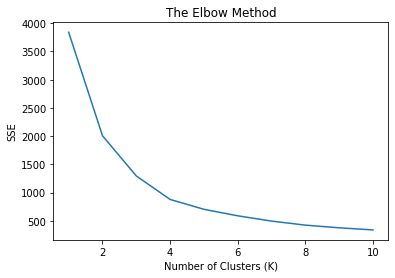

In [5]:
sse = []

for i in range(1,11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(data)
    sse.append(kmeans_model.inertia_)
    

plt.plot(range(1,11), sse)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("The Elbow Method")

## 6. Cross validating the value of K by Silhousette score

Text(0, 0.5, 'Silhouette Score')

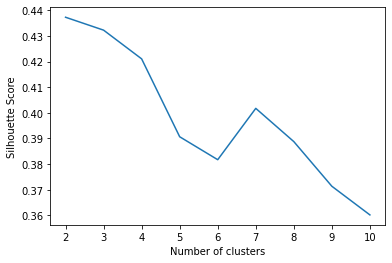

In [6]:
sscore = []

for k in range(2,11):
    kmeans_model = KMeans(n_clusters = k)
    labels = kmeans_model.fit_predict(data)
    score = silhouette_score(data, labels)
    sscore.append(score) 
        
plt.plot(range(2, 11), sscore)
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

## Hence from above verification optimum value of K is chosen to be 3

# 7. K-Means Model 

**KMeans**(**algorithm** ='auto', 
           **copy_x** = True, 
           **init** = 'k-means++', 
           **max_iter** = 300,
           **n_clusters** = 3,
           **n_init** = 10, 
           **n_jobs** = None, 
           **precompute_distances** = 'auto',
           **random_state** = None, 
           **tol** = 0.0001, 
           **verbose** = 0)

Parameters
----------

**`n_clusters`** : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

**`init`** : {'k-means++', 'random'}, default='k-means++'
     Method for initialization:
    1. `k-means++` : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence.
    2. `random`: choose `n_clusters` observations (rows) at random from data
    for the initial centroids.
    3. If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

**`n_init`** : int, default=10
    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of     n_init consecutive runs in terms of inertia.

**`max_iter`** : int, default=300
    Maximum number of iterations of the k-means algorithm for a
    single run.

**`tol`** : float, default=1e-4
    Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to     declare convergence.

**`precompute_distances`** : {'auto', True, False}, default='auto'
    Precompute distances (faster but takes more memory).
    1. `auto` : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.
    2. `True` : always precompute distances.
    3. `False` : never precompute distances.

**`verbose`** : int, default=0
    Verbosity mode.

**`random_state`** : int, RandomState instance or None, default=None
    Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

**`copy_x`** : bool, default=True
    If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back
    before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

**`n_jobs`**: int, default=None
    The number of OpenMP threads to use for the computation. Parallelism is sample-wise on the main cython loop which assigns each sample to its closest center.
    ``None`` or ``-1`` means using all processors.

**`algorithm`** : {"auto", "full", "elkan"}, default="auto"
    K-means algorithm to use. 
    The classical EM-style algorithm is "full".
    The "elkan" variation is more efficient on data with well-defined
    clusters, by using the triangle inequality. However it's more memory
    intensive due to the allocation of an extra array of shape
    (n_samples, n_clusters).
    For now "auto" (kept for backward compatibiliy) chooses "elkan" but it
    might change in the future for a better heuristic.


Attributes
----------
**`cluster_centers_`** : ndarray of shape (n_clusters, n_features)
    Coordinates of cluster centers. If the algorithm stops before fully
    converging (see ``tol`` and ``max_iter``), these will not be
    consistent with ``labels_``.

**`labels_`** : ndarray of shape (n_samples,)
    Labels of each point

**`inertia_`** : float
    Sum of squared distances of samples to their closest cluster center.

**`n_iter_`** : int
    Number of iterations run.

In [7]:
kmeans_model = KMeans(n_clusters=3, init="k-means++", )
kmeans_model.fit(data)
labels = kmeans_model.fit_predict(data)

In [9]:
kmeans_model.inertia_

1294.1061194048896

In [10]:
silhouette_score(data, labels)

0.4326772688038156

## 8. Visualization of Clusters

In [11]:
data = data.to_numpy()
data

array([[-0.37792125, -0.30246699],
       [-0.46112322,  0.60563556],
       [ 0.31425008,  0.40956895],
       ...,
       [ 0.16145185, -0.3815382 ],
       [-0.30654077, -0.30493365],
       [ 0.00283928, -0.0632696 ]])

In [12]:
labels

array([0, 2, 1, ..., 1, 0, 0])

In [13]:
data[labels==0,0]

array([-0.37792125, -0.4352721 , -0.22891816, ..., -0.10566804,
       -0.30654077,  0.00283928])

No handles with labels found to put in legend.


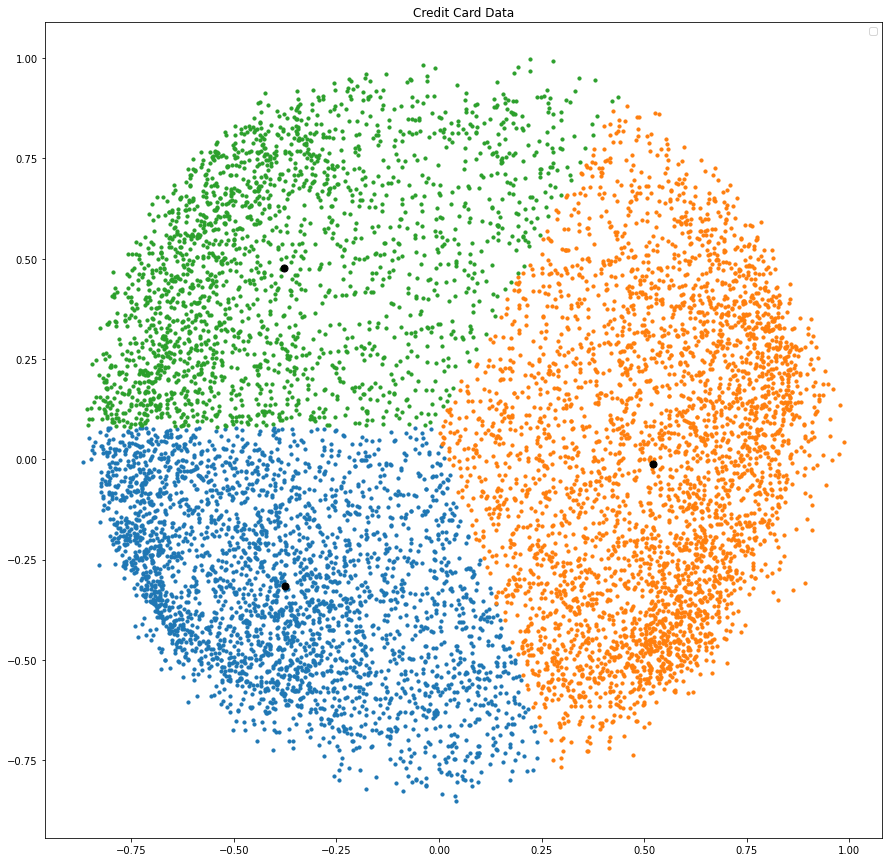

In [17]:
plt.figure(figsize=(15,15))
plt.title("Credit Card Data")
dist_labels = np.unique(labels)

for i in dist_labels:
    plt.scatter(data[labels==i,0], data[labels==i,1], s=10)
    
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=50)
plt.legend()